In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df_word = pd.read_csv("out/df_altered_word.csv")
df_word = df_word.rename(columns={'Noise Type': 'Type', 'Noise Rate': 'Rate', 'F1 Score': 'F1 Score'})
df_char = pd.read_csv("out/df_altered_char.csv")
df_bert = pd.read_csv("out/df_altered_bert.csv")  

In [66]:
clean_word = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.75517},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.75517}
]

clean_char = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.745409},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.745409}
]

clean_bert = [
    {'Type': 'capitalization_swap', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_swap', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_removal', 'Rate': 0, 'F1 Score': 0.914305},
    {'Type': 'character_replacement', 'Rate': 0, 'F1 Score': 0.914305}
]

new_word = pd.DataFrame(clean_word)
df_word = pd.concat([new_word, df_word], ignore_index=True)

new_char = pd.DataFrame(clean_char)
df_char = pd.concat([new_char, df_char], ignore_index=True)

new_bert = pd.DataFrame(clean_bert)
df_bert = pd.concat([new_bert, df_bert], ignore_index=True)

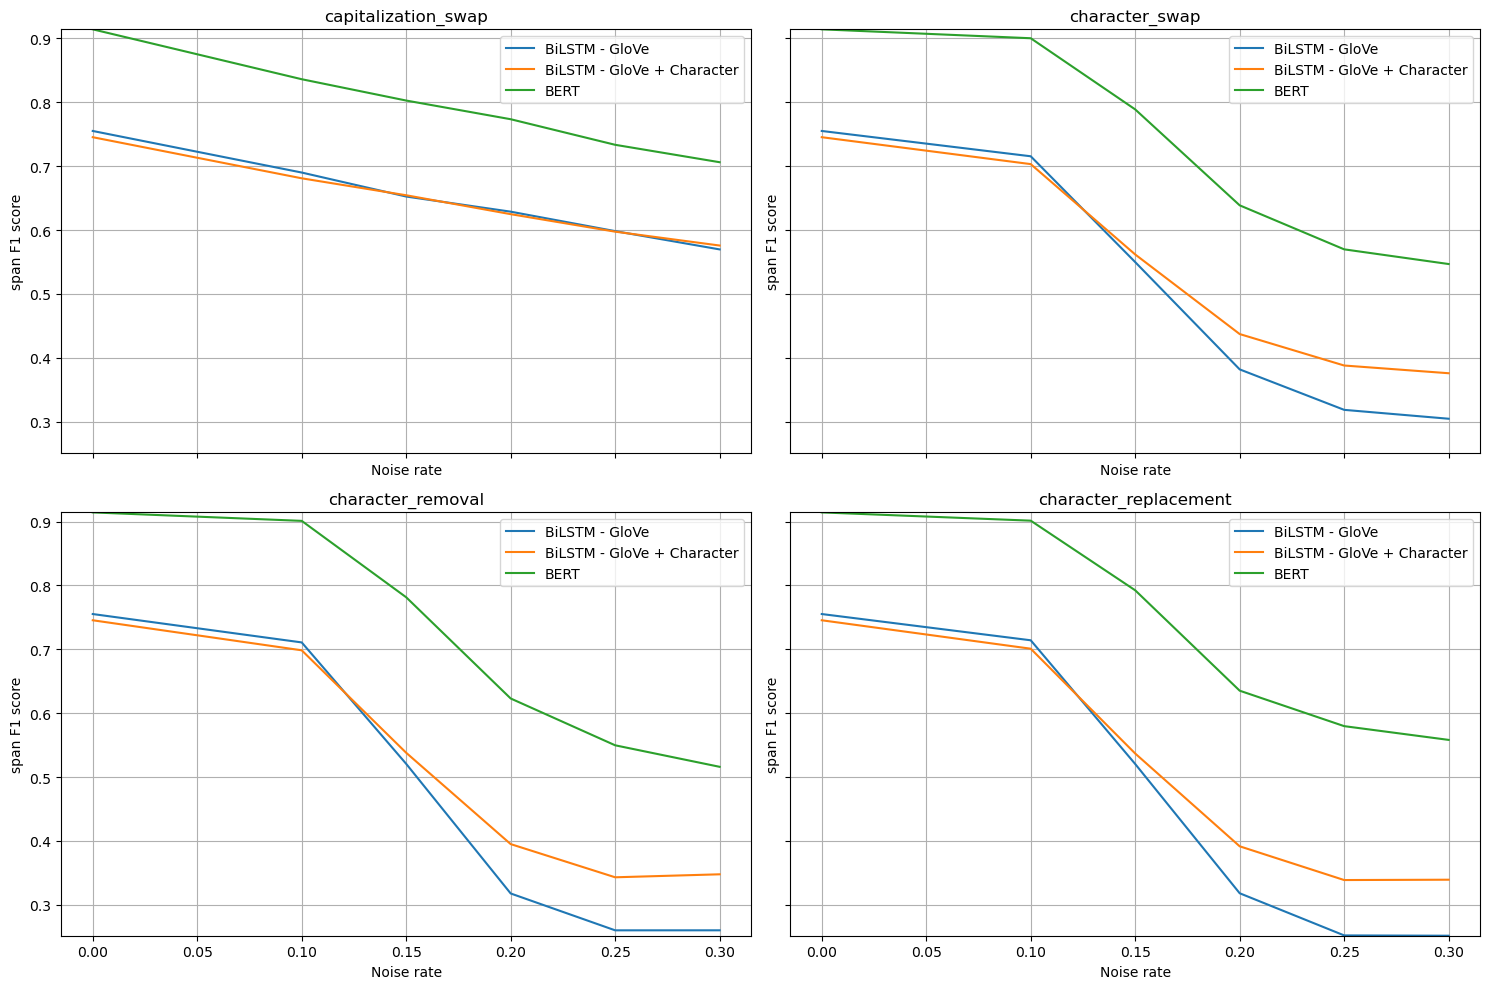

In [62]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(),  df_bert['F1 Score'].min())  
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_bert['F1 Score'].max())  

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - GloVe')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - GloVe + Character')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT') 
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig("out/performance_drop.png") 
plt.show()


#### Altered 2

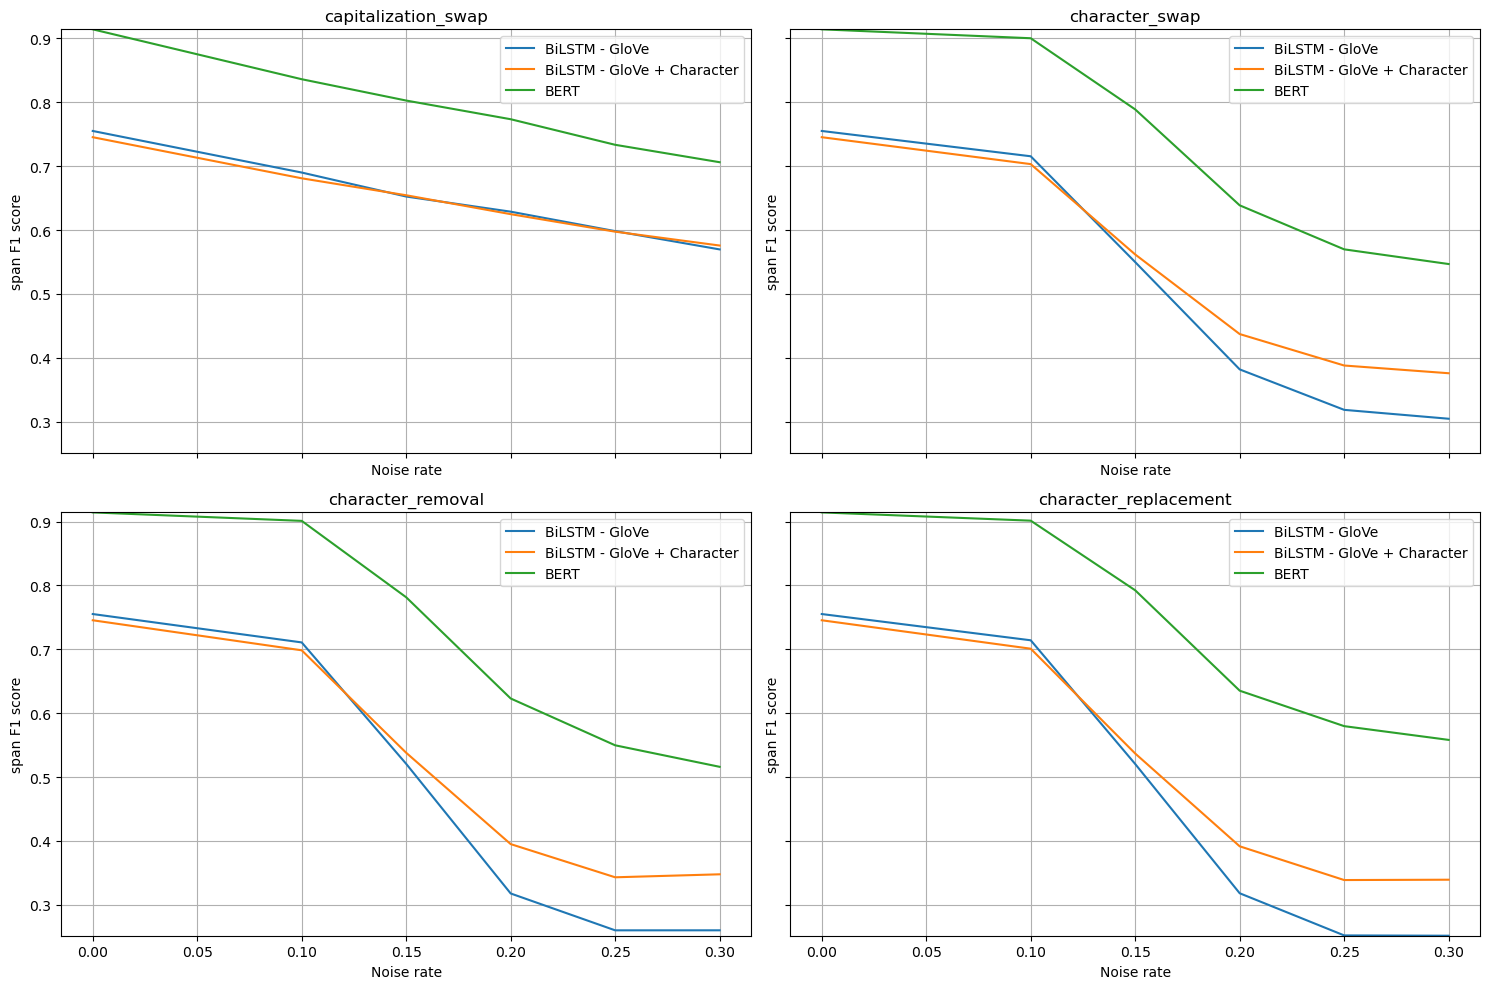

In [63]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(),  df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(), df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model3_filtered = df_random[df_random['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - GloVe')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - GloVe + Character')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT') 
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


#### Altered 3

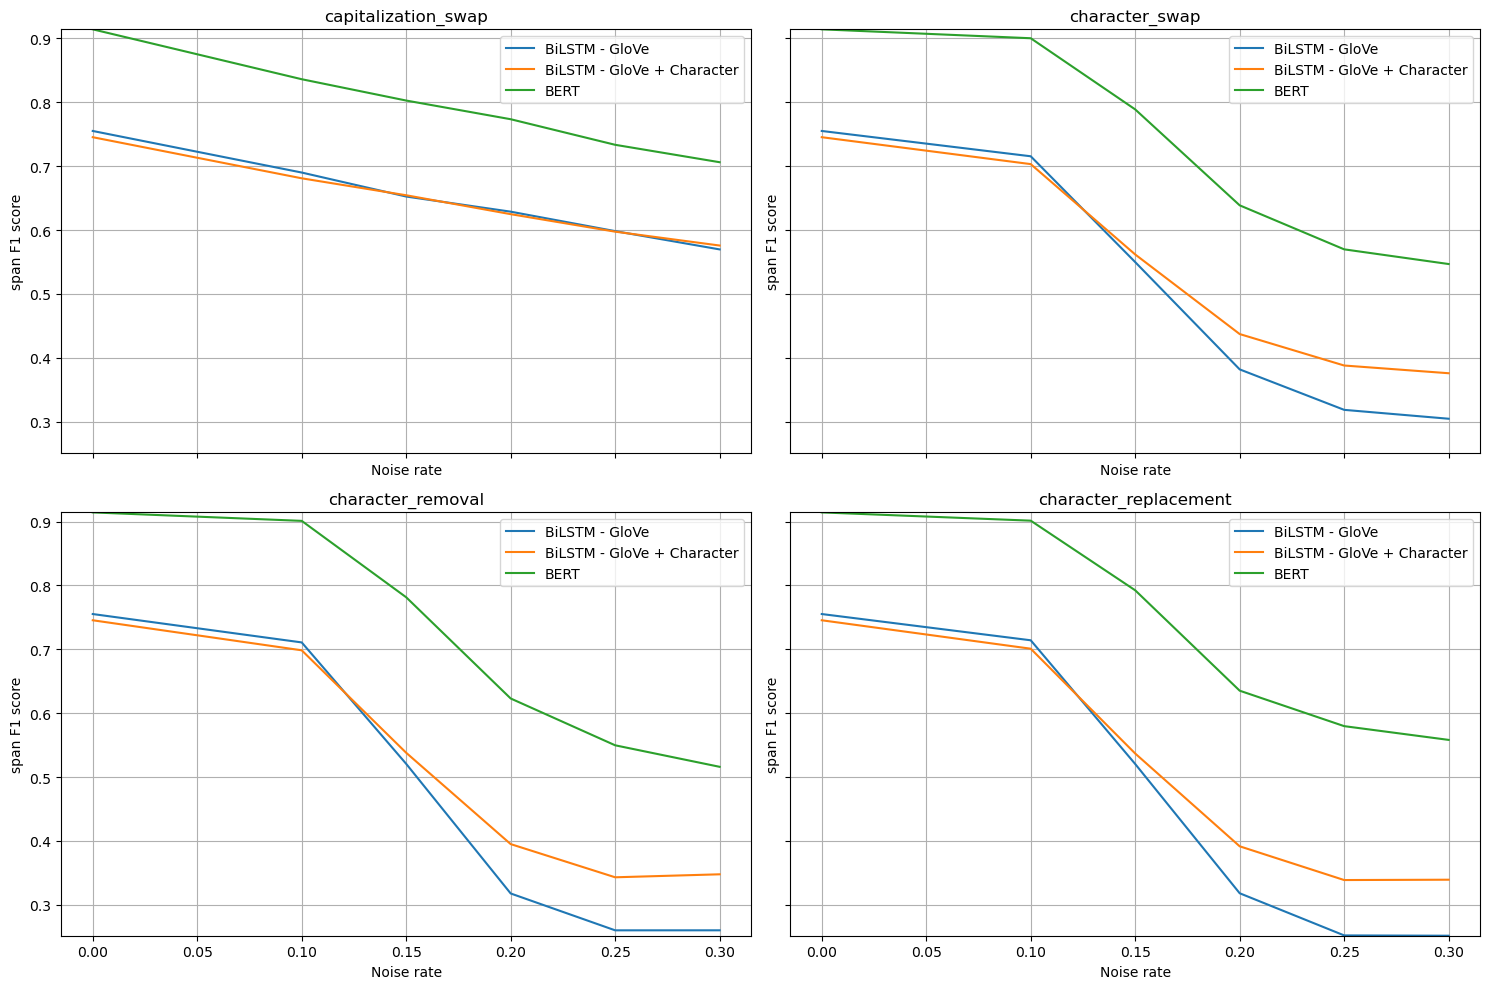

In [64]:
# Get unique noise types
noise_types = df_word['Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min(), df_bert['F1 Score'].min())  # Include BERT
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max(),  df_bert['F1 Score'].max())  # Include BERT

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Type'] == noise_type]
    df_model4_filtered = df_bert[df_bert['Type'] == noise_type]  # Filter BERT data
    
    # Plotting
    axs[i].plot(df_model1_filtered['Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - GloVe')
    axs[i].plot(df_model2_filtered['Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - GloVe + Character')
    axs[i].plot(df_model4_filtered['Rate'], df_model4_filtered['F1 Score'], label='BERT') 
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [71]:
# Rename columns to ensure unique score column names
df_word = df_word.rename(columns={'F1 Score': 'Score_Word'})
df_char = df_char.rename(columns={'F1 Score': 'Score_Char'})
df_bert = df_bert.rename(columns={'F1 Score': 'Score_Bert'})

# Merge the DataFrames on 'Type' and 'Rate'
combined_df = df_word.merge(df_char, on=['Type', 'Rate'], how='outer')
combined_df = combined_df.merge(df_bert, on=['Type', 'Rate'], how='outer')

# Filter the combined DataFrame for Rate 0, 0.10, 0.20, and 0.25
rate_0_df = combined_df[combined_df['Rate'] == 0].set_index('Type')
rate_10_df = combined_df[combined_df['Rate'] == 0.10].set_index('Type')
rate_20_df = combined_df[combined_df['Rate'] == 0.20].set_index('Type')
rate_25_df = combined_df[combined_df['Rate'] == 0.25].set_index('Type')

# Calculate the drop in performance
drop_10_df = ((rate_10_df[['Score_Word', 'Score_Char',  'Score_Bert']] - rate_0_df[['Score_Word', 'Score_Char', 'Score_Bert']]) / rate_0_df[['Score_Word', 'Score_Char', 'Score_Bert']]) * 100
drop_20_df = ((rate_20_df[['Score_Word', 'Score_Char',  'Score_Bert']] - rate_0_df[['Score_Word', 'Score_Char',  'Score_Bert']]) / rate_0_df[['Score_Word', 'Score_Char', 'Score_Bert']]) * 100
drop_25_df = ((rate_25_df[['Score_Word', 'Score_Char', 'Score_Bert']] - rate_0_df[['Score_Word', 'Score_Char', 'Score_Bert']]) / rate_0_df[['Score_Word', 'Score_Char', 'Score_Bert']]) * 100

# Rename columns for clarity
drop_10_df.columns = ['Drop_Score_Word_10', 'Drop_Score_Char_10',  'Drop_Score_Bert_10']
drop_20_df.columns = ['Drop_Score_Word_20', 'Drop_Score_Char_20', 'Drop_Score_Bert_20']
drop_25_df.columns = ['Drop_Score_Word_25', 'Drop_Score_Char_25', 'Drop_Score_Bert_25']

# Reset the index to have 'Type' as a column
drop_10_df = drop_10_df.reset_index()
drop_20_df = drop_20_df.reset_index()
drop_25_df = drop_25_df.reset_index()

# Merge the drops into a single DataFrame
performance_drop_df = drop_10_df.merge(drop_20_df, on='Type').merge(drop_25_df, on='Type')

# Display the new DataFrame
print(performance_drop_df)

performance_drop_df

                    Type  Drop_Score_Word_10  Drop_Score_Char_10  \
0    capitalization_swap           -8.618952           -8.632492   
1         character_swap           -5.245658           -5.651895   
2      character_removal           -5.883932           -6.307764   
3  character_replacement           -5.441479           -5.972095   

   Drop_Score_Bert_10  Drop_Score_Word_20  Drop_Score_Char_20  \
0           -8.543058          -16.731956          -16.165383   
1           -1.525071          -49.432451          -41.348995   
2           -1.449691          -57.935985          -47.015187   
3           -1.414329          -57.891175          -47.477621   

   Drop_Score_Bert_20  Drop_Score_Word_25  Drop_Score_Char_25  \
0          -15.393922          -20.766690          -19.842664   
1          -30.139615          -57.822166          -47.956176   
2          -31.866191          -65.578299          -53.986978   
3          -30.531542          -66.632609          -54.565016   

   Drop

,Type,Drop_Score_Word_10,Drop_Score_Char_10,Drop_Score_Bert_10,Drop_Score_Word_20,Drop_Score_Char_20,Drop_Score_Bert_20,Drop_Score_Word_25,Drop_Score_Char_25,Drop_Score_Bert_25
0,capitalization_swap,-8.618952,-8.632492,-8.543058,-16.731956,-16.165383,-15.393922,-20.766690,-19.842664,-19.774014
1,character_swap,-5.245658,-5.651895,-1.525071,-49.432451,-41.348995,-30.139615,-57.822166,-47.956176,-37.676116
2,character_removal,-5.883932,-6.307764,-1.449691,-57.935985,-47.015187,-31.866191,-65.578299,-53.986978,-39.883516
3,character_replacement,-5.441479,-5.972095,-1.414329,-57.891175,-47.477621,-30.531542,-66.632609,-54.565016,-36.602387


In [72]:
combined_df

,Type,Rate,Score_Word,Score_Char,Score_Bert
0,capitalization_swap,0.00,0.755170,0.745409,0.914305
1,character_swap,0.00,0.755170,0.745409,0.914305
2,character_removal,0.00,0.755170,0.745409,0.914305
3,character_replacement,0.00,0.755170,0.745409,0.914305
4,capitalization_swap,0.10,0.690082,0.681062,0.836195
5,capitalization_swap,0.15,0.652507,0.654516,0.802807
6,capitalization_swap,0.20,0.628815,0.624911,0.773558
7,capitalization_swap,0.25,0.598346,0.597500,0.733510
8,capitalization_swap,0.30,0.569720,0.575798,0.706244
9,character_swap,0.10,0.715556,0.703279,0.900361
